<div style="
    position: relative;
    height: 220px;
    overflow: hidden;
    border-radius: 12px;
    text-align: center;
    display: flex;
    align-items: center;
    justify-content: center;
">
  <!-- Blurred Background Image -->
  <div style="
      background: url('') no-repeat center center;
      background-size: cover;
      filter: blur(8px);
      height: 100%;
      width: 100%;
      position: absolute;
      top: 0;
      left: 0;
      z-index: 1;
  "></div>

  <!-- Overlay Content with Project Title -->
  <div style="
      position: relative;
      z-index: 2;
      color: white;
      font-size: 28px;
      font-weight: ;
      font-family: 'Segoe UI', Tahoma, Geneva ,Verdana] , sans-serif;
      text-shadow: 1px 1px 2px rgba(237, 229, 229, 0.8);
  ">
    CUSTOMER PURCHASE BEHAVIOUR ANALYSIS USING DATA SCIENCE TECHNIQUES
  </div>
</div>

In [13]:
Course = '''
CSD : 301 DESCRIPTIVE ANALYTICS PROJECT
B.Tech. (Hons.) (CSE - Data Science and Data Engineering)
'''
print(Course)


CSD : 301 DESCRIPTIVE ANALYTICS PROJECT
B.Tech. (Hons.) (CSE - Data Science and Data Engineering)



In [14]:
Details = '''
Name             : Aditya Kumar Singh
Registration No. : 12304738
Roll No.         : RK23TGA22
'''
print(Details)


Name             : Aditya Kumar Singh
Registration No. : 12304738
Roll No.         : RK23TGA22



DATASET OVERVIEW
==============================================

In [15]:
data_overview = '''
The dataset contains 357 responses with 25 columns related to customer purchasing behavior, including:
Introduction (Age, Gender, Location, Income)
Shopping Preferences (Preferred brands, Shopping frequency, Spending habits)
Festive Shopping Trends
Online vs. Offline Behavior
Challenges & Suggestions
'''
print(data_overview)


The dataset contains 357 responses with 25 columns related to customer purchasing behavior, including:
Introduction (Age, Gender, Location, Income)
Shopping Preferences (Preferred brands, Shopping frequency, Spending habits)
Festive Shopping Trends
Online vs. Offline Behavior
Challenges & Suggestions



IMPORT LIBRARIES
============================

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
import plotly.express as px
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.font_manager as fm
from pywaffle import Waffle
from wordcloud import WordCloud
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet

LOAD DATASET
=========================

In [17]:
df = pd.read_excel("E:\\SEM 4\\CSD 301_DESCRIPTIVE ANALYTICS PROJECT\\CSD 301_Project_ETP\Aditya Kumar Singh 12304738\\CSD 301_ETP_DATASET.xlsx")

In [18]:
df.head()

,Timestamp,What is your Name?,Email?,What is your age group?,What is your gender?,Where do you live?,What is your monthly income range?,Where do you shop the most?,Prefered Product Category?,Prefer Specific Brands?,...,Do you shop more during festive seasons?,What do you usually buy during festivals?,Do you wait for discounts or sales to shop?,Which type of promotion influences you the most?,How do you usually pay for online purchases?,Which online platform do you use the most?,How important is fast delivery for you?,How would you rate your overall shopping experience?,What are the biggest challenges you face while shopping?,What can retailers improve to enhance your experience?
0,2025-01-17 01:11:00,Dev Pratap singh,d.devpratap2010@gmail.com,18-25,Male,Rajisthan,"Below Rs 10,000",Both,Beauty Products,Yes,...,Yes,Gifts,Yes,Flash Sales,COD,Amazon,Very Important,4,High Prices,Faster Delivery
1,2025-01-17 01:33:00,Karmendra Mahawar,karmendramahawarkm@gmail.com,18-25,Male,Jaipur,"Rs 10,000 - Rs 25,000",Online,Electronics,No,...,Maybe,Sweets,Yes,Coupons,Credit/Debit Cards,Other,Very Important,4,Limited Stock,Better Customer Support
2,2025-01-17 08:06:00,Sahil,sahilshaikh2662@gmail.com,18-25,Male,Mumbai,"Below Rs 10,000",Online,Clothings,Yes,...,Yes,Clothes,Yes,Flash Sales,Credit/Debit Cards,Myntra,Important,4,Payment Failures,More Variety
3,2025-01-17 12:57:00,Kartikeya Rai,kartikeyarai1@gmail.com,18-25,Male,Lucknow,"Above Rs 50,000",Online,Clothings,Yes,...,Maybe,Clothes,Yes,Buy 1 Get 1 Free,Credit/Debit Cards,Other,Very Important,5,Limited Stock,More Variety
4,2025-01-17 19:04:00,Chetan garg,chetangarg31123@gmail.com,18-25,Male,Punjab,Unemployed,Both,Groceries,Yes,...,Yes,Gifts,Yes,Cashback Offers,UPI,Myntra,Neutral,4,Limited Stock,More Variety


In [19]:
print("The Data Set Contain :", df.shape, "Rows and Columns.") 

The Data Set Contain : (357, 24) Rows and Columns.


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 24 columns):
 #   Column                                                    Non-Null Count  Dtype         
---  ------                                                    --------------  -----         
 0   Timestamp                                                 357 non-null    datetime64[ns]
 1   What is your Name?                                        357 non-null    object        
 2   Email?                                                    357 non-null    object        
 3   What is your age group?                                   357 non-null    object        
 4   What is your gender?                                      357 non-null    object        
 5   Where do you live?                                        357 non-null    object        
 6   What is your monthly income range?                        357 non-null    object        
 7   Where do you shop the most?                 

In [21]:
df.columns.to_list()

['Timestamp',
 'What is your Name?',
 'Email?',
 'What is your age group?',
 'What is your gender?',
 'Where do you live?',
 'What is your monthly income range?',
 'Where do you shop the most?',
 'Prefered Product Category?',
 'Prefer Specific Brands?',
 'Your preferred brands?',
 'How often do you shop?',
 'How much do you spend on average per purchase?',
 'What influences your decision to buy?',
 'Do you shop more during festive seasons?',
 'What do you usually buy during festivals?',
 'Do you wait for discounts or sales to shop?',
 'Which type of promotion influences you the most?',
 'How do you usually pay for online purchases?',
 'Which online platform do you use the most?',
 'How important is fast delivery for you?',
 'How would you rate your overall shopping experience?',
 'What are the biggest challenges you face while shopping?',
 'What can retailers improve to enhance your experience?']

In [22]:
df.isnull().sum()

Timestamp                                                    0
What is your Name?                                           0
Email?                                                       0
What is your age group?                                      0
What is your gender?                                         0
Where do you live?                                           0
What is your monthly income range?                           0
Where do you shop the most?                                  0
Prefered Product Category?                                   0
Prefer Specific Brands?                                      0
Your preferred brands?                                      43
How often do you shop?                                       0
How much do you spend on average per purchase?               0
What influences your decision to buy?                        0
Do you shop more during festive seasons?                     0
What do you usually buy during festivals?              

1. Age Group Distribution (Violin Plot - Visualize the distribution of numeric data)

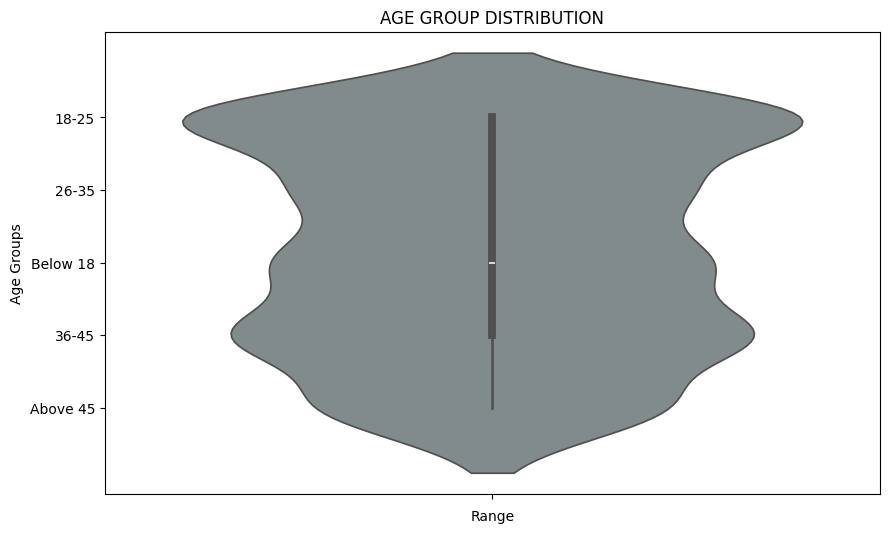

In [23]:
plt.figure(figsize=(10,6))
sns.violinplot(y = df["What is your age group?"], color = "#7F8C8D")
plt.xlabel("Range")
plt.ylabel("Age Groups")
plt.title("AGE GROUP DISTRIBUTION")

plt.show()

2. Gender Distribution (Pie Chart - Compare the different categories)

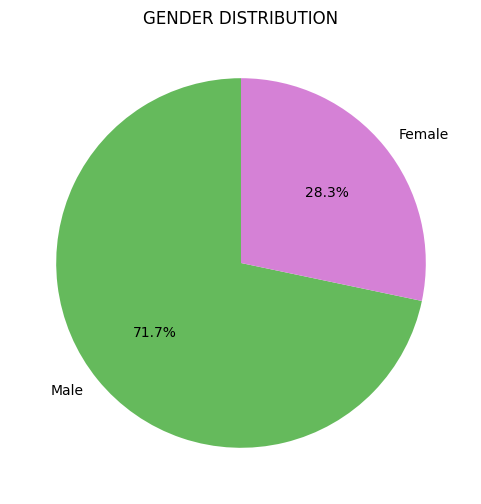

In [24]:
plt.figure(figsize=(6,6))
df["What is your gender?"].value_counts().plot.pie(autopct = "%1.1f%%", startangle = 90, colors = ["#65BA5C", "#D581D6"])
plt.title("GENDER DISTRIBUTION")
plt.ylabel("")

plt.show()

3. Income Range Distribution (Donut Chart - Visually represent data as proportions of a whole)

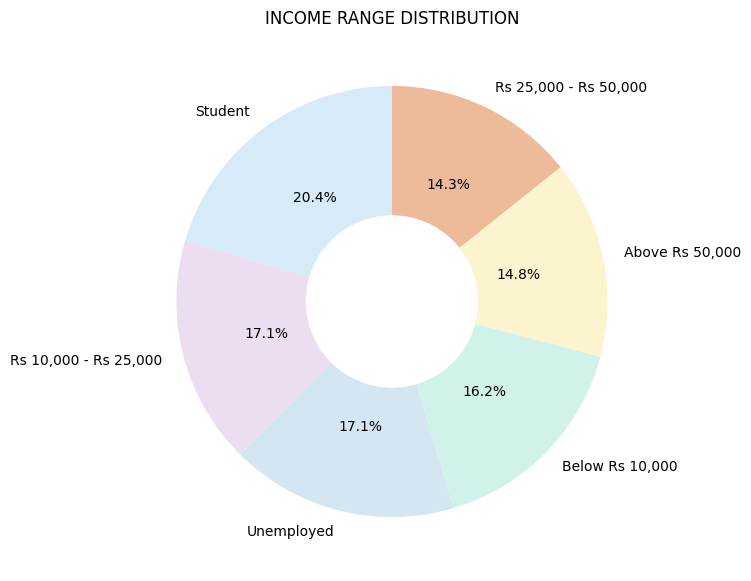

In [25]:
plt.figure(figsize=(7,7))
color = ["#D6EAF8", "#EBDEF0", "#D4E6F1", "#D1F2EB", "#FCF3CF", "#EDBB99"] 
IncomeCount = df["What is your monthly income range?"].value_counts()
plt.pie(IncomeCount, labels = IncomeCount.index, autopct = "%1.1f%%", startangle = 90, colors=color)
plt.gca().add_artist(plt.Circle((0,0),0.4,fc='white'))
plt.title("INCOME RANGE DISTRIBUTION")

plt.show()

4. Where Customer Shop Most (Treemap - Easy Comparison)

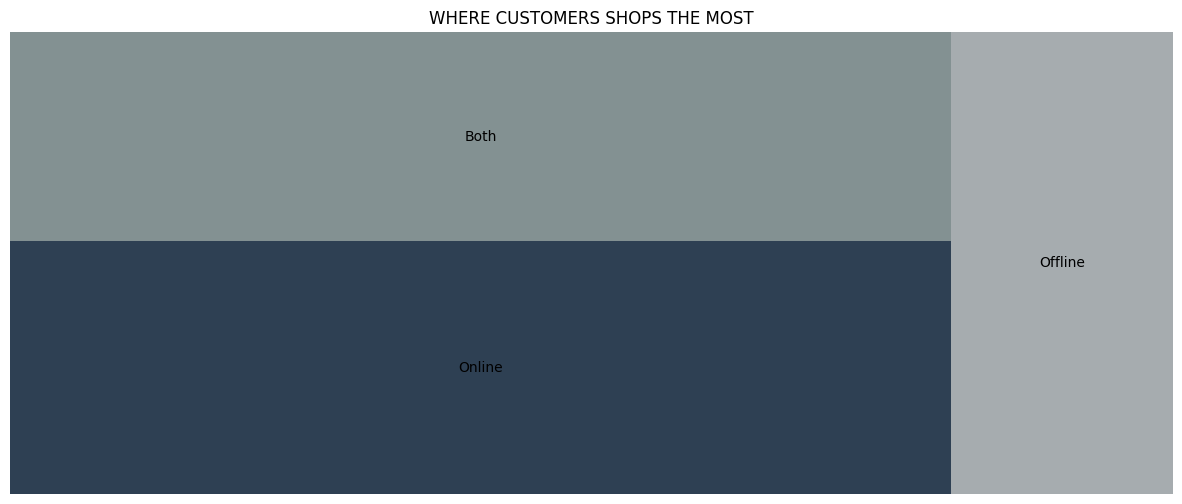

In [26]:
plt.figure(figsize = (15,6))
platform_Count = df["Where do you shop the most?"].value_counts()

squarify.plot(sizes = platform_Count.values, label = platform_Count.index, color = ["#2E4053", "#839192", "#A6ACAF"])

plt.title("WHERE CUSTOMERS SHOPS THE MOST")
plt.axis("off")

plt.show()

5. Customer Prefered Product Category (Bar Plot - Categorical Count Bar Chart)

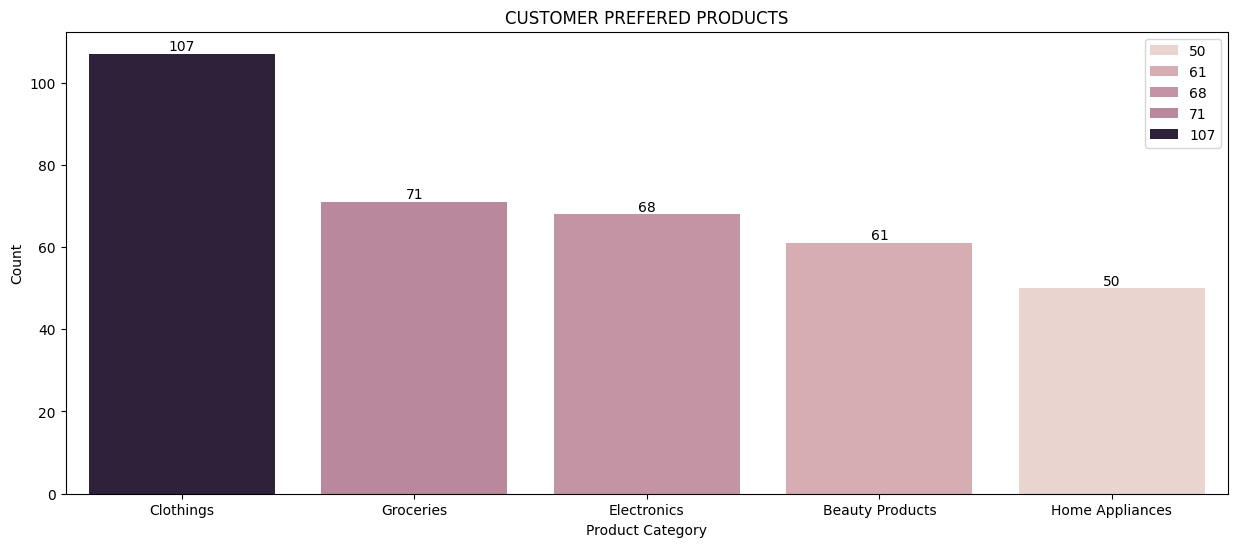

In [27]:
col_I = "Prefered Product Category?"
catCount = df[col_I].value_counts()

plt.figure(figsize = ( 15, 6))
ax = sns.barplot(x = catCount.index, y = catCount.values, hue = catCount.values)
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation = 0)
plt.xlabel("Product Category")
plt.ylabel("Count")
plt.title("CUSTOMER PREFERED PRODUCTS")

plt.show()

6. Brand Preference Distribution (Grouped bar chart - Compare values of secondary grouping, without focusing on the total values of a primary category)

<Figure size 1500x600 with 0 Axes>

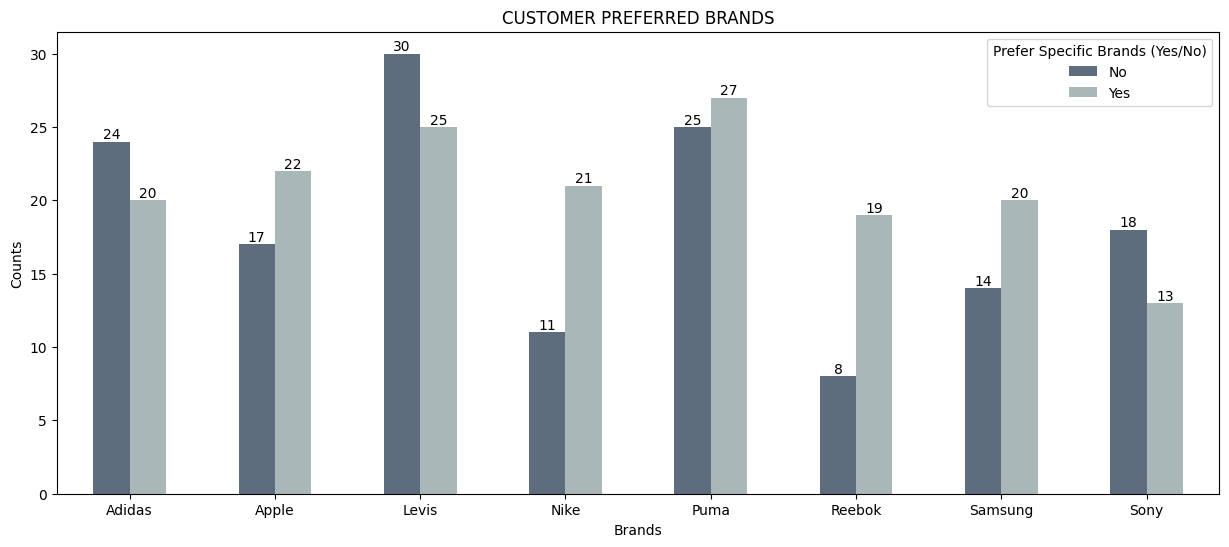

In [28]:
col_J = "Prefer Specific Brands?"
col_K = "Your preferred brands?"
grouped_brands = df.groupby([col_K, col_J]).size().unstack()

plt.figure(figsize = (15, 6))
ax = grouped_brands.plot(kind = "bar",  figsize = (15, 6), color = ["#5D6D7E", "#AAB7B8"])
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel("Brands")
plt.ylabel("Counts")
plt.title("CUSTOMER PREFERRED BRANDS")
plt.xticks(rotation = 0)
plt.legend(title = "Prefer Specific Brands (Yes/No)")
plt.show()

7. Shopping Habit (Bar Plot - Categorical Count Bar Chart)

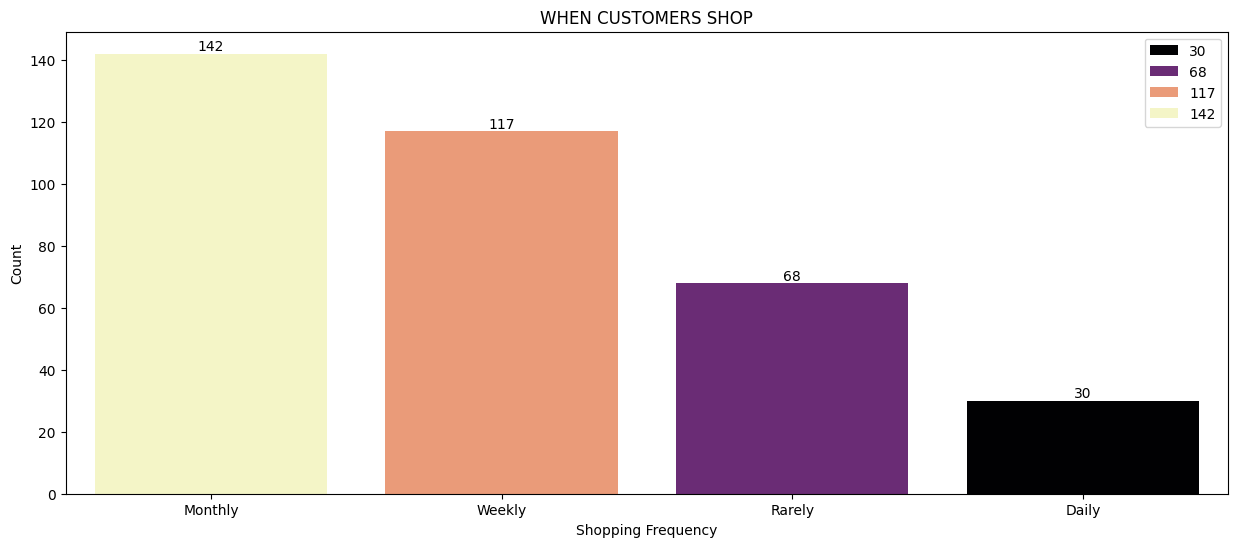

In [29]:
col_L = "How often do you shop?"
shoppingCount = df[col_L].value_counts()

plt.figure(figsize = (15, 6))
ax = sns.barplot(x = shoppingCount.index, y = shoppingCount.values, hue = shoppingCount.values, palette="magma")
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel("Shopping Frequency")
plt.ylabel("Count")
plt.title("WHEN CUSTOMERS SHOP")
plt.xticks(rotation = 0)

plt.show()

8. Per purchase money Spend (Pie Chart - Compare the different categories)

In [30]:
col_M = df["How much do you spend on average per purchase?"].value_counts().reset_index()
col_M.columns = ['Spending Range', 'Count']

fig = px.pie(col_M, values='Count', names='Spending Range', title='AVERAGE SPENDING PER PURCHASE', color_discrete_sequence=px.colors.qualitative.Bold)
fig.show()

9. Reason for buying the Products (Word Cloud - Easy-to-understand view of important data point)

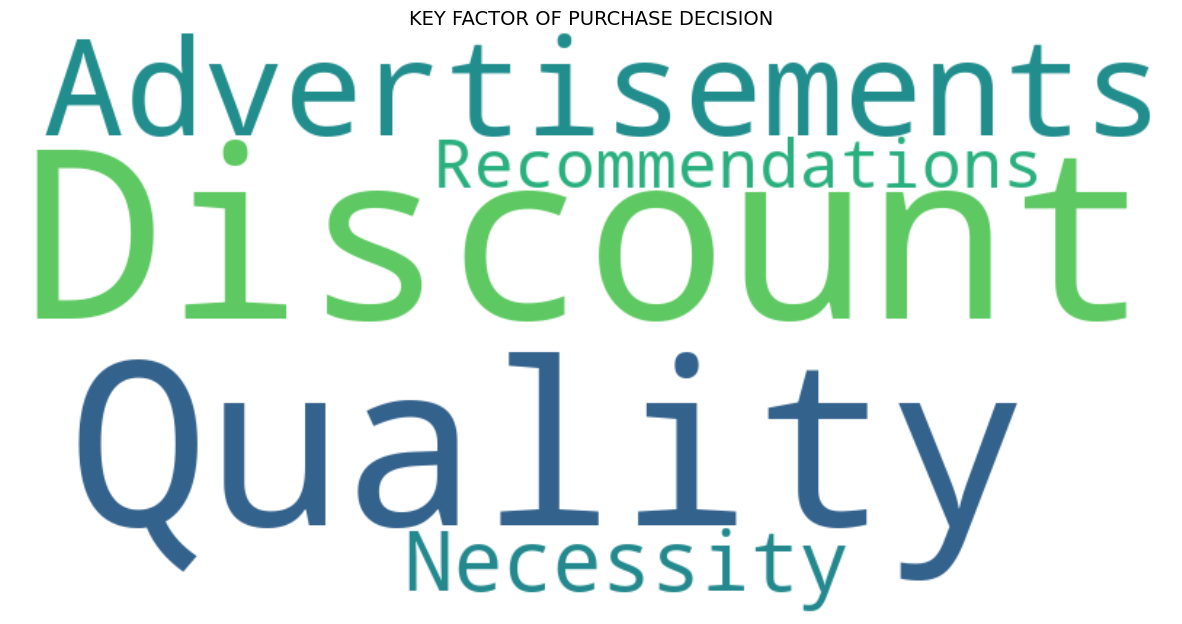

In [31]:
text = " ".join(df["What influences your decision to buy?"].dropna())
wordcloud = WordCloud( width = 800, height = 400, background_color = "white").generate(text)

plt.figure(figsize=(15,10))
plt.imshow(wordcloud , interpolation = "bilinear")
plt.axis("off")
plt.title("KEY FACTOR OF PURCHASE DECISION", fontsize = 14)

plt.show()

10. Festive Shopping Behavior (Sunburst Chart / Radial Treemaps / Multi-Level pie charts - Visualize hierarchical data by representing each level of the hierarchy as a concentric ring)

In [32]:
fig = px.sunburst(df, path=["Do you shop more during festive seasons?", "What do you usually buy during festivals?"], 
title="FESTIVE SHOPPING PREFERENCES")
fig.show()

11. Discount Influence on Shopping (Waffle Chart - To visually represent proportions or progress towards a target)

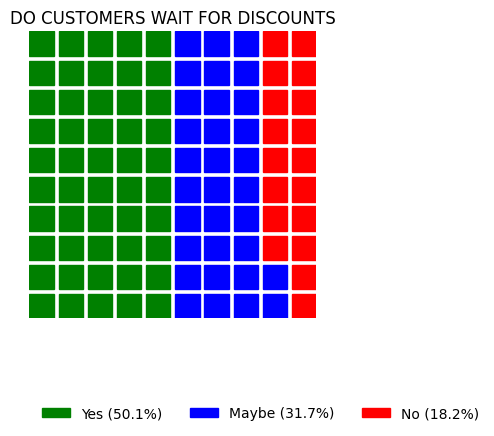

In [33]:
col_Q = "Do you wait for discounts or sales to shop?"

value_counts = df[col_Q].value_counts(normalize=True) * 100
value_counts = value_counts.round(1)

data = value_counts.to_dict()
colors = ['green', 'blue', 'red'][:len(data)]

fig = plt.figure(FigureClass=Waffle, rows=10, values=data, colors=colors, title={'label': 'DO CUSTOMERS WAIT FOR DISCOUNTS', 'loc': 'center'}, labels=[f"{k} ({v}%)" for k, v in data.items()], legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(data), 'framealpha': 0})
plt.show()

12. Which type of promotion influences you the most  (Bar Chart - to visually compare different categories or groups of data, making it easy to identify trends and relationships)

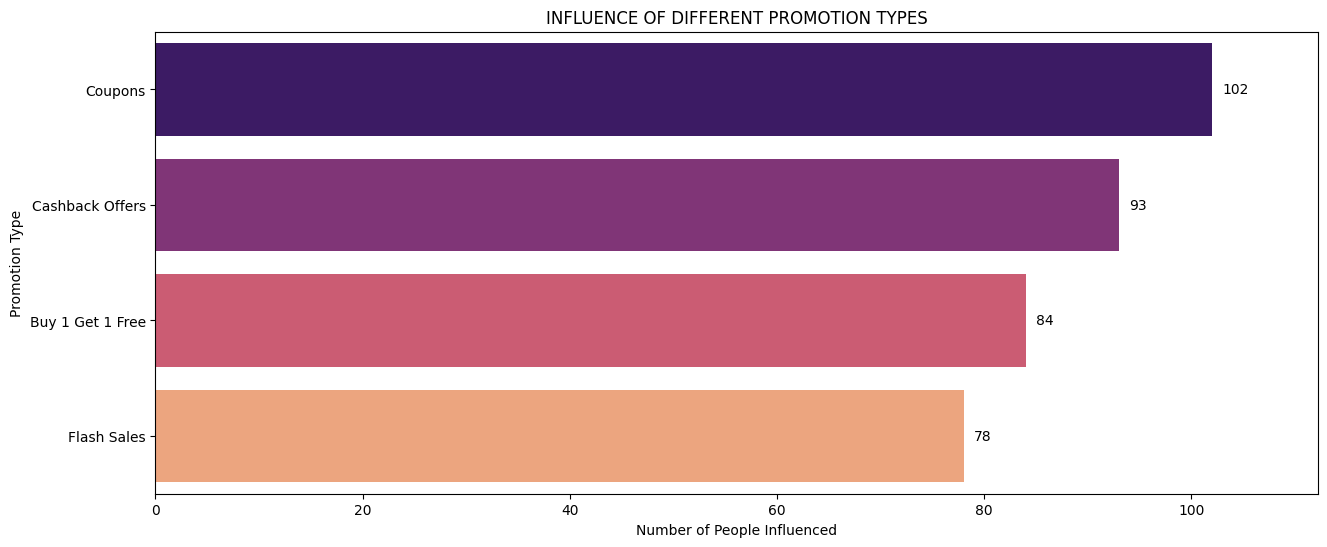

In [34]:
col_R=df["Which type of promotion influences you the most?"].value_counts()

plt.figure(figsize=(15,6))
ax=sns.barplot(x=col_R.values, y=col_R.index, hue=col_R.index, palette="magma")

for i, v in enumerate(col_R.values) :
    ax.text(v + 1, i, str(v), color='black', va='center')

plt.xlabel("Number of People Influenced")
plt.ylabel("Promotion Type")
plt.title("INFLUENCE OF DIFFERENT PROMOTION TYPES")
plt.xlim(0, max(col_R.values)*1.1)
plt.show()

13. Preferred Payment Methods (Treemap - Easy Comparison)

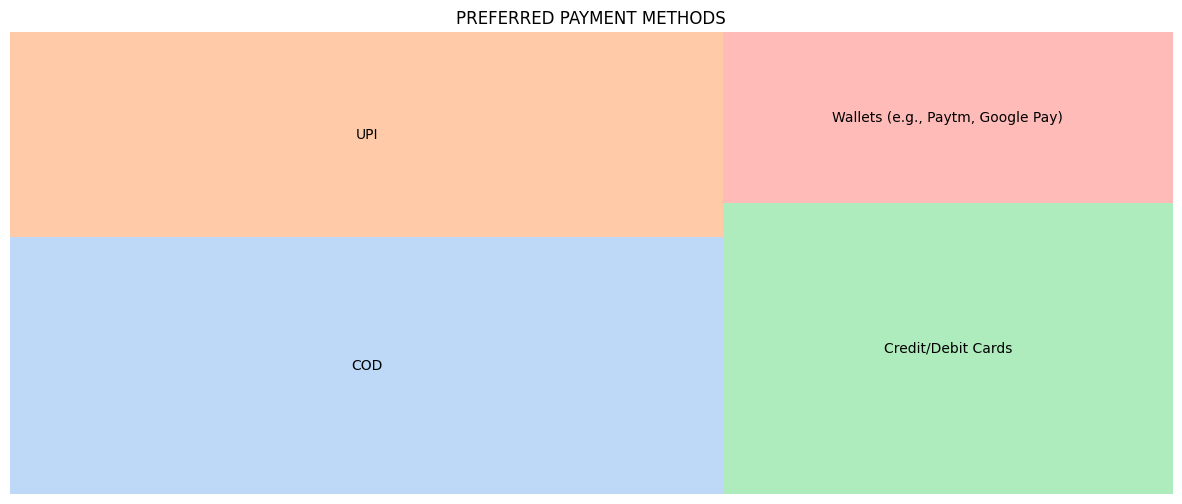

In [35]:
col_S = df["How do you usually pay for online purchases?"].value_counts()

plt.figure(figsize=(15,6))
squarify.plot(sizes=col_S.values, label=col_S.index, alpha=0.7, color=sns.color_palette("pastel"))

plt.title("PREFERRED PAYMENT METHODS")
plt.axis("off")
plt.show()

14. Which online platform do you use the most?  (Doughnut Chart - to visually represent the proportional distribution of data categories, showing how each category contributes to a whole)

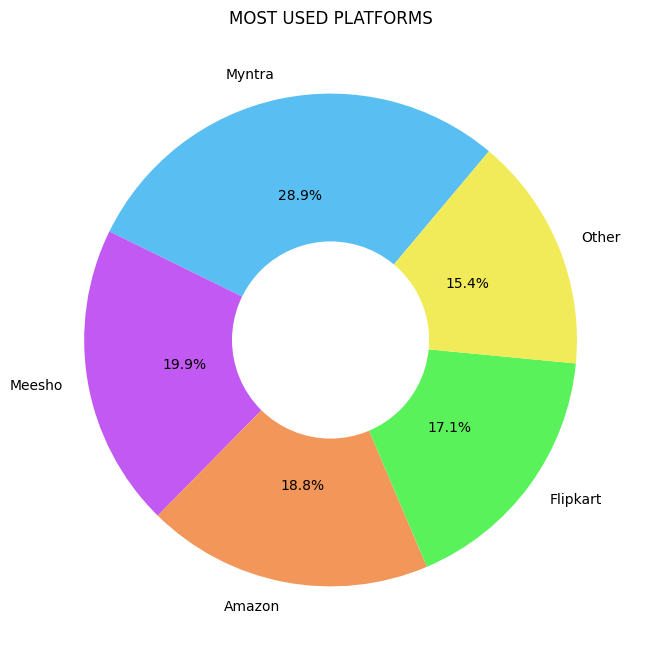

In [36]:
col_T = df["Which online platform do you use the most?"].value_counts()
colors = ['#59BFF2', '#C159F2', '#f29759', '#59F25B', '#F2EB59']

plt.figure(figsize=(8,8))
plt.pie(col_T, labels=col_T.index, autopct='%1.1f%%', startangle=50 , colors=colors)
plt.gca().add_artist(plt.Circle((0,0),0.4,fc='white'))
plt.title("MOST USED PLATFORMS")
plt.show()

15. How important is fast delivery for you?  (Lollipop Chart - to visually represent comparisons between different categories, ranking, or trends over time)

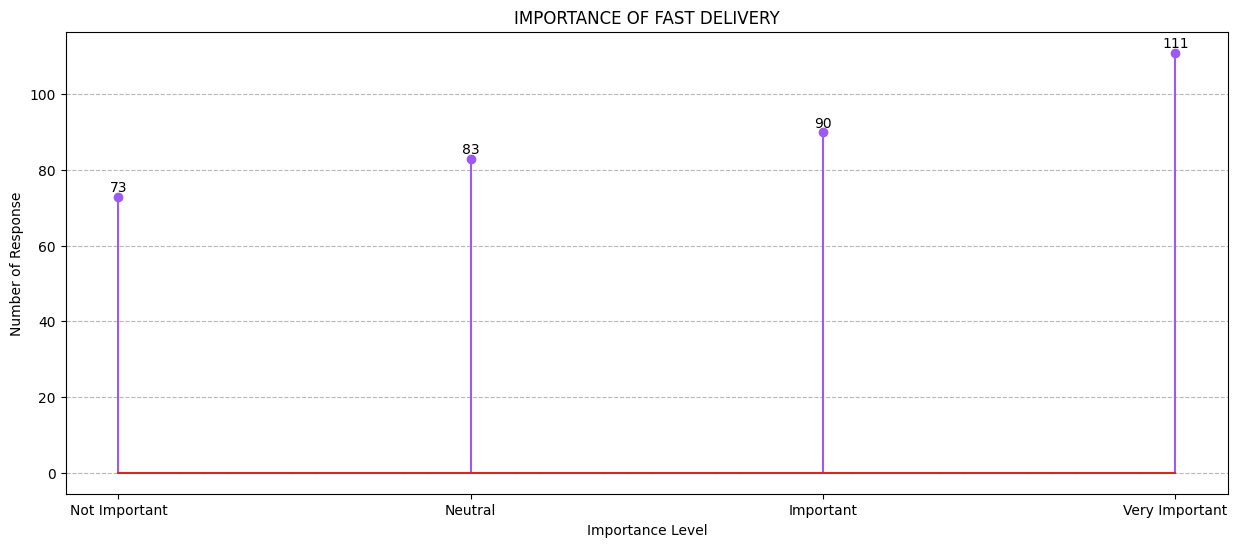

In [37]:
col_U = df["How important is fast delivery for you?"].value_counts().sort_values()
y_pos = np.arange(len(col_U))

plt.figure(figsize=(15,6))
markerline, stemlines, baseline = plt.stem(y_pos, col_U, linefmt="#9E59F2", markerfmt="o")

for i, count in enumerate(col_U):
    plt.text(y_pos[i], count + 0.5, str(count), ha='center', va='bottom')

plt.xticks(y_pos, col_U.index, rotation=0)
plt.xlabel("Importance Level")
plt.ylabel("Number of Response")
plt.title("IMPORTANCE OF FAST DELIVERY")
plt.grid(axis="y", linestyle="--", alpha=0.9)

plt.show()

16. How would you rate your overall shopping experience?  (Star Rating Chart - to provide a standardized and easily understood way to rate or classify different entities)

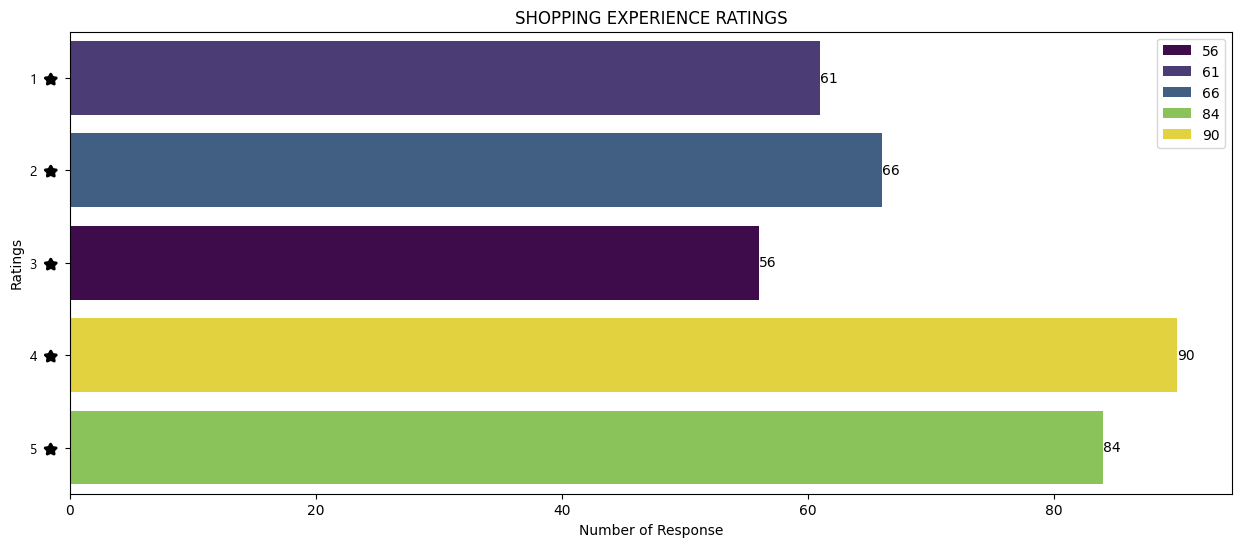

In [38]:
emoji_font_path = "C:/Windows/Fonts/seguiemj.ttf"
emoji_font = fm.FontProperties(fname=emoji_font_path)

col_V = df["How would you rate your overall shopping experience?"].value_counts().sort_index()
rating_labels = [f"{rating} ⭐" for rating in col_V.index]

plt.figure(figsize=(15,6))
ax = sns.barplot(x=col_V.values, y=rating_labels, hue = col_V.values, palette="viridis")

ax.set_yticklabels(rating_labels, fontproperties=emoji_font)

for container in ax.containers:
    ax.bar_label(container)

plt.xlabel("Number of Response")
plt.ylabel("Ratings")
plt.title("SHOPPING EXPERIENCE RATINGS")
plt.show()

17. What are the biggest challenges you face while shopping? (Bar Chart - to visually compare different categories or groups of data, making it easy to identify trends and relationships)

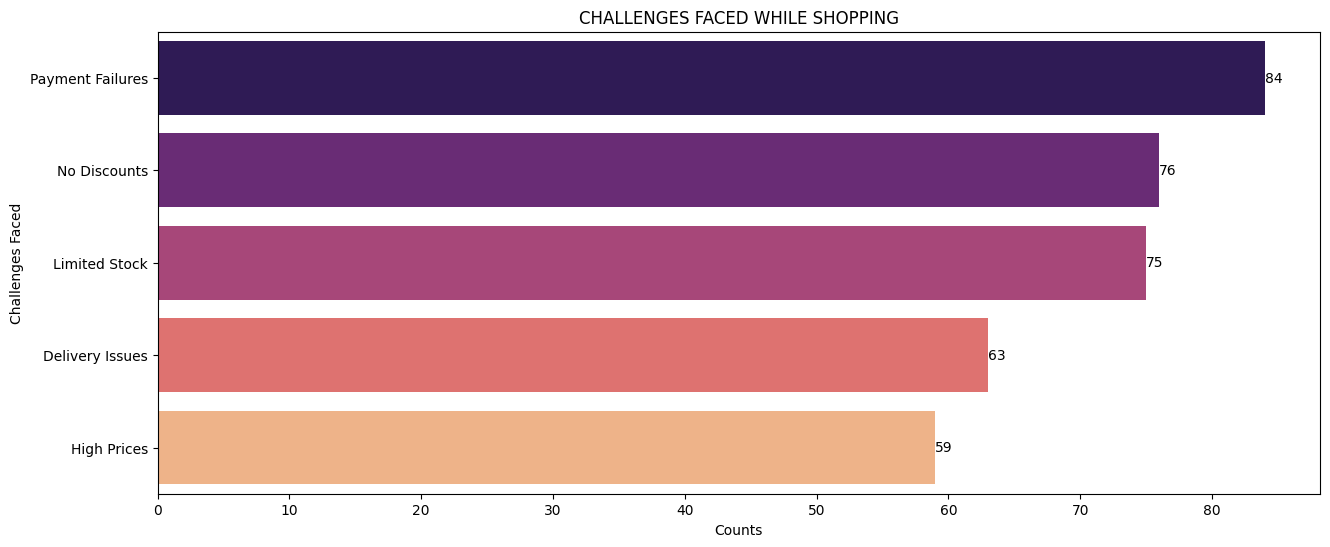

In [39]:
plt.figure ( figsize=(15, 6))
ax = sns.countplot(data=df, y="What are the biggest challenges you face while shopping?", palette="magma", order=df["What are the biggest challenges you face while shopping?"].value_counts().index)
for container in ax.containers:
    ax.bar_label(container)
plt.title("CHALLENGES FACED WHILE SHOPPING")
plt.xlabel("Counts")
plt.ylabel("Challenges Faced")
plt.show()

18. What can retailers improve to enhance your experience? (Bar Chart - to visually compare different categories or groups of data, making it easy to identify trends and relationships)  

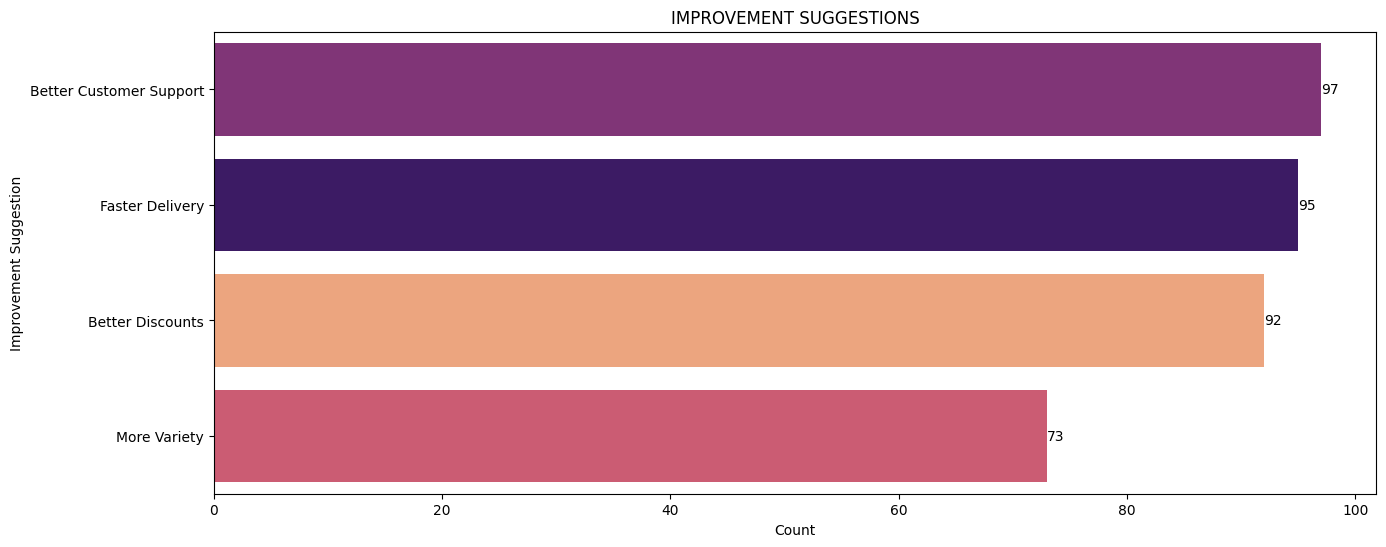

In [40]:
plt.figure( figsize=(15, 6))
ax = sns.countplot(data=df, y = "What can retailers improve to enhance your experience?", hue = "What can retailers improve to enhance your experience?", palette = "magma", 
              order = df["What can retailers improve to enhance your experience?"].value_counts().index)
for container in ax.containers:
    ax.bar_label(container)
plt.title("IMPROVEMENT SUGGESTIONS")
plt.xlabel("Count")
plt.ylabel("Improvement Suggestion")
plt.show()

FOMO - Fear of Missing Out
======


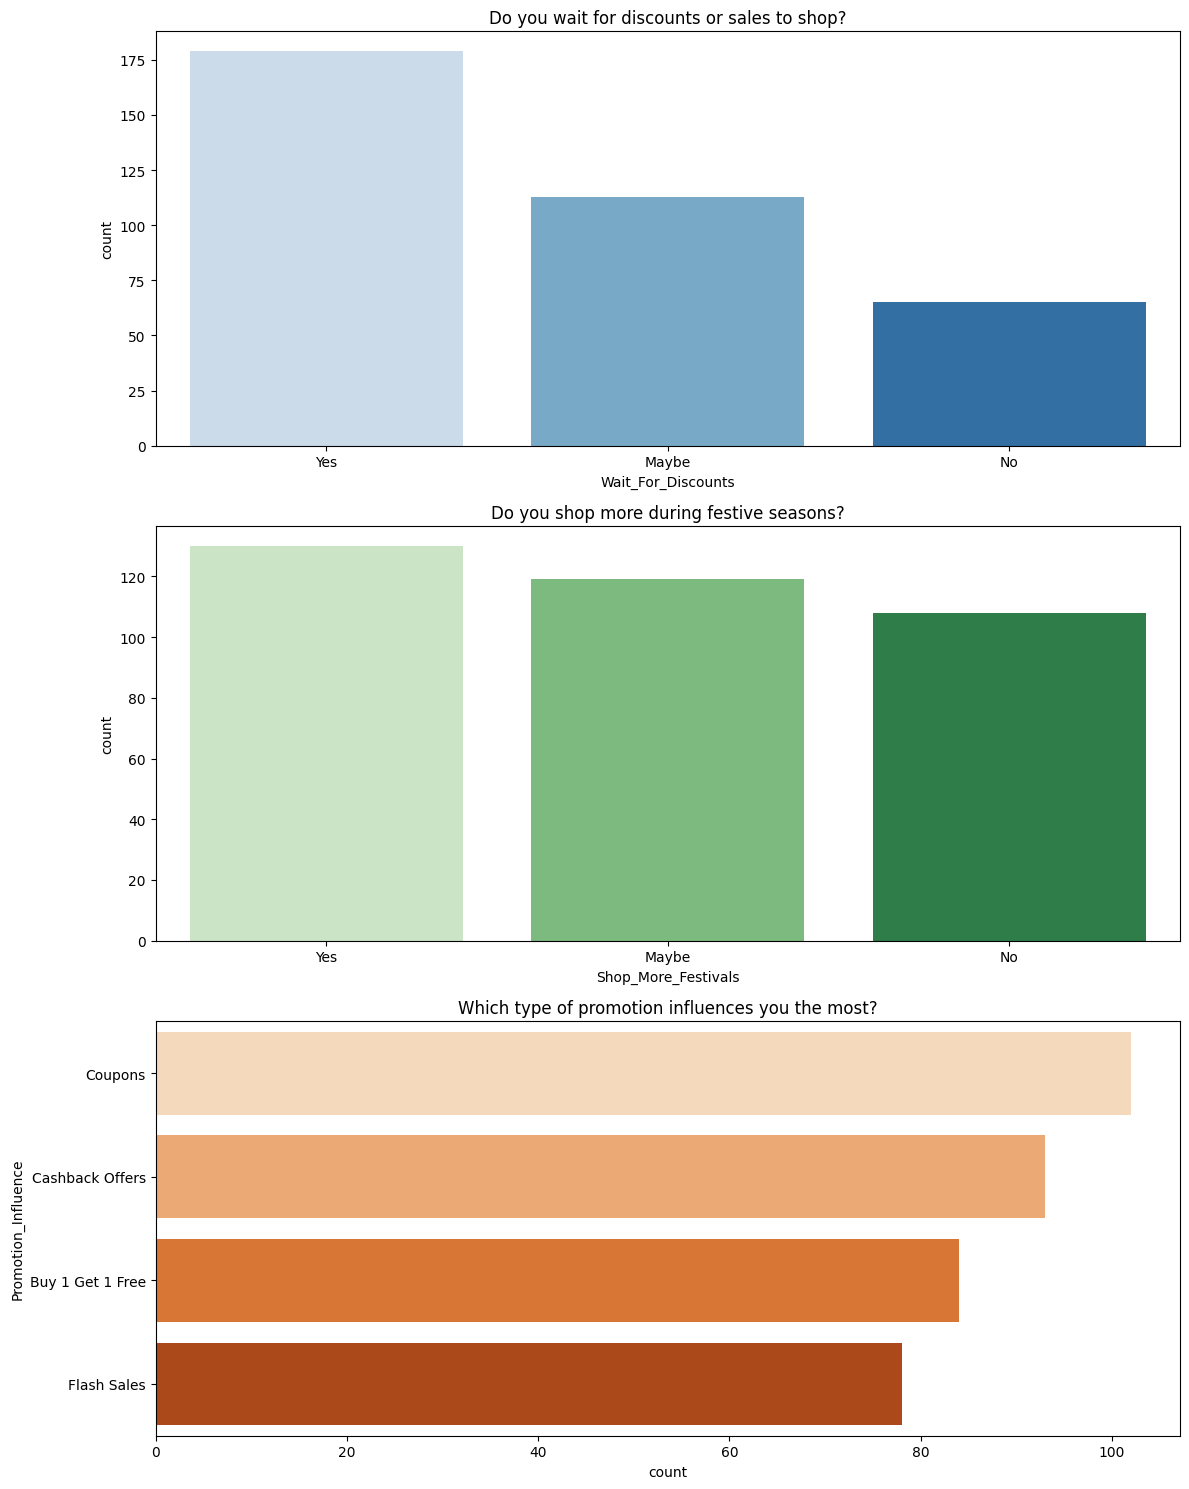

In [47]:
df.rename(columns={
    'Do you wait for discounts or sales to shop?': 'Wait_For_Discounts',
    'Do you shop more during festive seasons?': 'Shop_More_Festivals',
    'Which type of promotion influences you the most?': 'Promotion_Influence',
    'What influences your decision to buy?': 'Decision_Influence',
    'How often do you shop?': 'Shopping_Frequency'
}, inplace=True)

plt.rcParams['figure.figsize'] = (10, 5)

fig, axes = plt.subplots(3, 1, figsize=(12, 15))

sns.countplot(data=df, x='Wait_For_Discounts', palette='Blues', ax=axes[0])
axes[0].set_title('Do you wait for discounts or sales to shop?')

sns.countplot(data=df, x='Shop_More_Festivals', palette='Greens', ax=axes[1])
axes[1].set_title('Do you shop more during festive seasons?')

sns.countplot(
    data=df,
    y='Promotion_Influence',
    palette='Oranges',
    order=df['Promotion_Influence'].value_counts().index,
    ax=axes[2]
)
axes[2].set_title('Which type of promotion influences you the most?')

plt.tight_layout()
plt.show()


-------------------------------THANK YOU------------------------------
==============